In [1]:
# import basic libraries

import numpy as np

import pandas as pd

# import visualisation libraries

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from statsmodels.graphics.correlation import plot_corr

from sklearn.model_selection import train_test_split

plt.style.use('seaborn')

In [3]:
df = pd.read_excel('default_credit.xls')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# getting Meta Data Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [6]:
#checking for null values

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
print('SEX ' + str(sorted(df['SEX'].unique())))

SEX [1, 2]


In [8]:
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [0, 1, 2, 3, 4, 5, 6]


In [9]:
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [0, 1, 2, 3]


In [10]:
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))

PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [11]:
print('default.payment.next.month ' \

      + str(sorted(df['default payment next month'].unique())))

default.payment.next.month [0, 1]


In [12]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)

df.loc[fill, 'EDUCATION'] = 4

In [13]:
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


In [14]:
fill = (df.MARRIAGE == 0)

df.loc[fill, 'MARRIAGE'] = 2

In [15]:
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [1, 2, 3]


In [16]:
df = df.rename(columns={'default payment next month': 'DEFAULT','PAY_0': 'PAY_1'})

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<font size ='5'>Exploratory Data Analysis
We can split EDA into three parts:

Univariate analysis


Bivariate analysis

Correlation
</font>

<AxesSubplot:xlabel='DEFAULT', ylabel='count'>

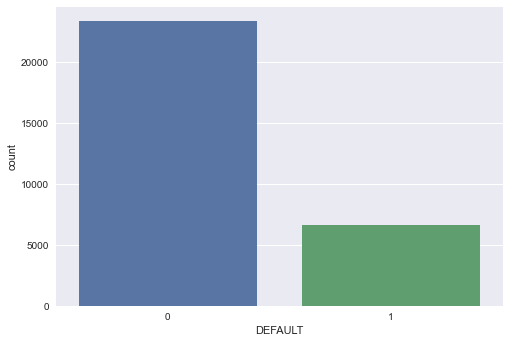

In [17]:
sns.countplot(x="DEFAULT", data=df)

In [18]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

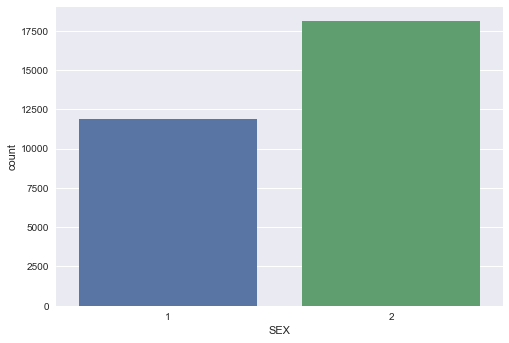

In [19]:
sns.countplot(x="SEX", data=df)

In [20]:
#Calculate the exact count of the values in the SEX column:

df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

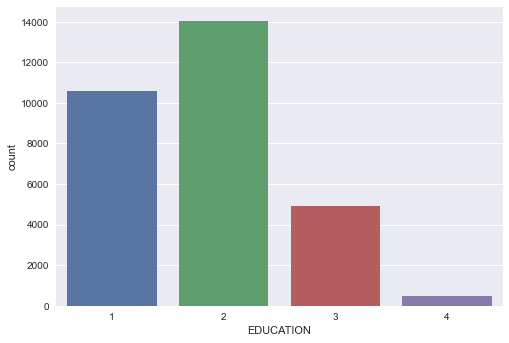

In [21]:
sns.countplot(x="EDUCATION", data=df)

In [22]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

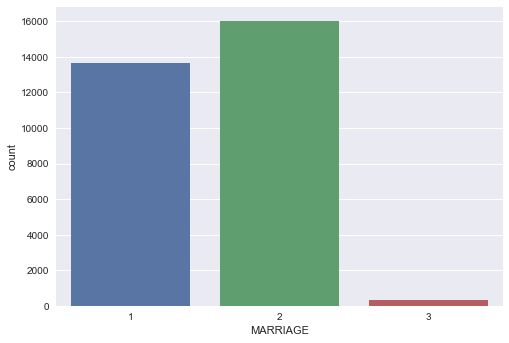

In [23]:
sns.countplot(x="MARRIAGE", data=df)

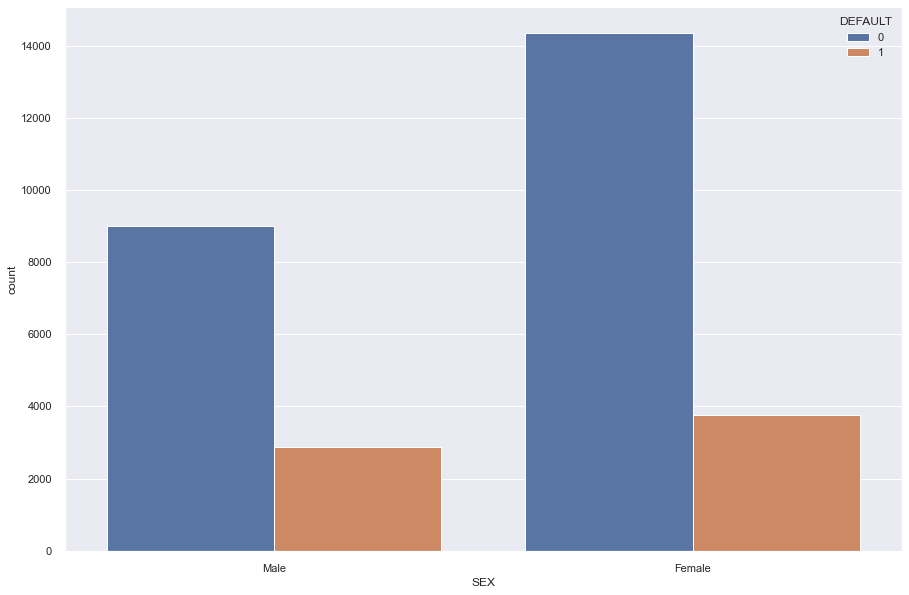

In [24]:
sns.set(rc={'figure.figsize':(15,10)})

edu = sns.countplot(x='SEX', hue='DEFAULT', data=df)

edu.set_xticklabels(['Male','Female'])

plt.show()

In [25]:
pd.crosstab(df.SEX,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763
All,0.778800,0.221200


<font size = '4'>Evaluating the Relationship between the DEFAULT Column and the EDUCATION and MARRIAGE Columns</font>

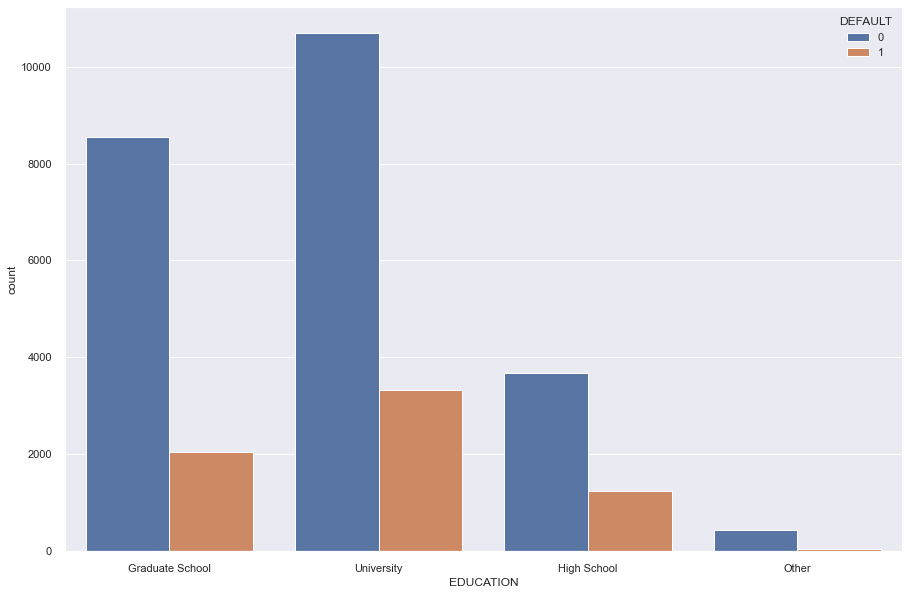

In [26]:
sns.set(rc={'figure.figsize':(15,10)})

edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)

edu.set_xticklabels(['Graduate School','University',\

                     'High School','Other'])

plt.show()

In [27]:
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index')

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513


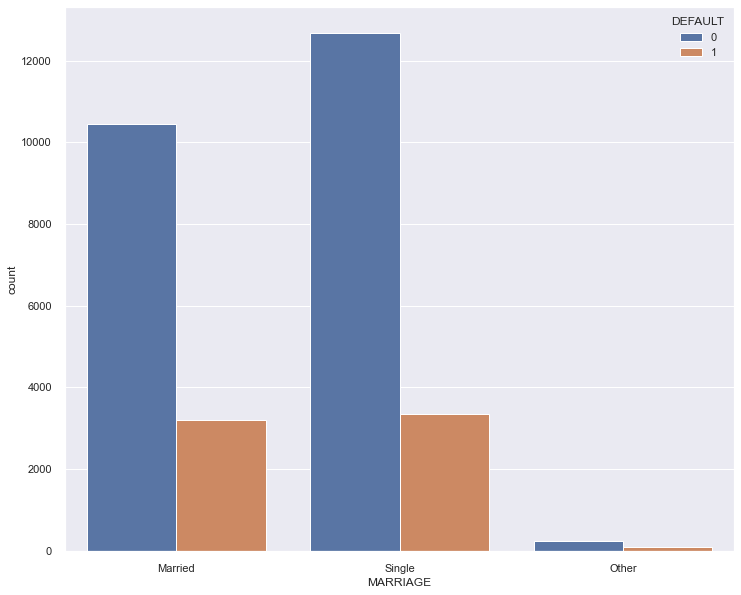

In [28]:
sns.set(rc={'figure.figsize':(12,10)})

marriage = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df)

marriage.set_xticklabels(['Married','Single','Other'])

plt.show()

In [29]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
MARRIAGE,,
1,0.765283,0.234717
2,0.791110,0.208890
3,0.739938,0.260062
All,0.778800,0.221200


<font size = '4'>Evaluating the Relationship between the AGE and DEFAULT Columns</font>

In [30]:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


In [31]:
pd.crosstab(df.AGE,df.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


In [32]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


<font size="5">correlation</font>

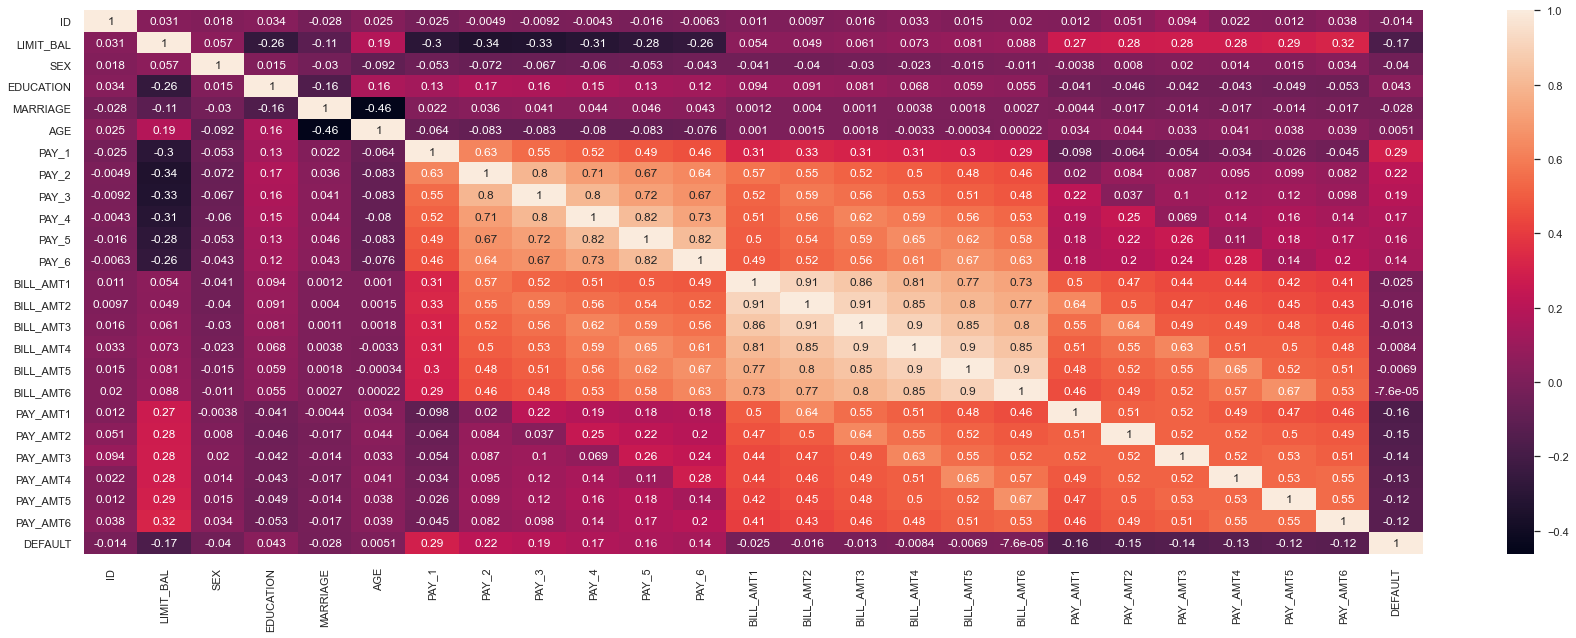

In [33]:
corr = df.corr(method = 'spearman')

f, ax = plt.subplots(figsize=(30, 10))

sns.heatmap(corr, annot = True)

plt.show()

<font size = "3">A male customer is more likely to default than a female customer

People with a relationship of other are more likely to default than married or single people.


 A customer whose highest qualification is a high-school is likely to default than a customer who went to graduate or university

A customer who is 27 and 29 has the higherst probability of defaulting the payments.</font>

In [34]:
df1 = df.drop('ID', axis = 1)

df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
#importing classification libraries

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, make_scorer

In [36]:
X = df1.drop('DEFAULT', axis = 1)

y = df1['DEFAULT']

In [37]:
#splitting dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=42)

In [38]:
scaler = RobustScaler()

normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

In [42]:
normalized_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns)

In [43]:
from imblearn.over_sampling import SMOTE



In [44]:
smote = SMOTE(random_state =12,sampling_strategy =1.0)

In [45]:
X_train_smote,y_train_smote = smote.fit_resample(normalized_x_train,y_train)

In [46]:
X_train_smote.shape

(37354, 23)

In [47]:
print(len(y_train_smote))

37354


In [48]:
print(y_train_smote.sum())

18677


In [49]:
#logistic regression with smote_over_sampling

from sklearn.linear_model import LogisticRegression

smoteLR = LogisticRegression()

smoteLR.fit(X_train_smote, y_train_smote)


LogisticRegression()

In [50]:
from sklearn import metrics
y_prediction = smoteLR.predict(normalized_x_test)

print('Accuracy:', metrics.accuracy_score(y_test,y_prediction))

Accuracy: 0.6886666666666666


In [52]:
# Instantiate a Random Forest classifier: tree_smote

from sklearn.ensemble import RandomForestClassifier

tree_smote = RandomForestClassifier()

tree_smote.fit(X_train_smote, y_train_smote)

y_prediction_smoteRF = tree_smote.predict(normalized_x_test)

print('Accuracy:', metrics.accuracy_score(y_test,y_prediction_smoteRF))

Accuracy: 0.7961666666666667


In [53]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



In [54]:
print(classification_report(y_test,y_prediction_smoteRF))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4687
           1       0.54      0.46      0.50      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



In [59]:
from sklearn.model_selection import RandomizedSearchCV


# Create the random grid
param_dist = {'n_estimators': [200,300,400,500,600,700],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X_train_smote,y_train_smote)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 400, 'max_features': 5, 'max_depth': 9, 'criterion': 'gini'}


Accuracy: 0.773

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4687
           1       0.48      0.57      0.52      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000


Average 5-Fold CV Score: 0.7822 , Standard deviation: 0.0319


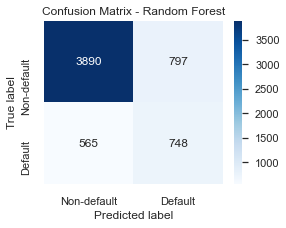

In [60]:
from sklearn.model_selection import cross_val_score

Ran = RandomForestClassifier(criterion= 'gini', max_depth= 9, 
                                     max_features= 5, n_estimators= 400, 
                                     random_state=0)
Ran.fit(X_train_smote, y_train_smote)
y_prediction4 = Ran.predict(normalized_x_test)
print('Accuracy:', metrics.accuracy_score(y_test,y_prediction4))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X_train_smote, y_train_smote, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_prediction4))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix4 = confusion_matrix(y_test,Ran.predict(normalized_x_test))
sns.heatmap(ConfMatrix4,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");